# Ultrasound Breast Images for Breast Cancer

About Dataset
This dataset consists of ultrasound images related to benign and malignant breast cancers. The images have been augmented by rotation and sharpening to produce sufficient amount of images.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


from tensorflow.keras.applications.resnet50 import preprocess_input
# from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

from tensorflow.keras.preprocessing.image import load_img

## Breast Cancer Image Classification

Use pre-trained CNN: RESnet

In [2]:
model = ResNet50(
    weights='imagenet',
    input_shape=(224, 224, 3)
)

In [ ]:


!wget https://upload.medbullets.com/topic/120423/images/breastca.jpg -o 

In [7]:
filepath = 'train/benign/benign (36)-rotated1-rotated2.png'
img = load_img(filepath, target_size=(224, 224))

x = np.array(img)

X = np.array([x])

X = preprocess_input(X)

pred = model.predict(X)
decode_predictions(pred)

1/1 [==============================] - 1s 1s/step


[[('n03063689', 'coffeepot', 0.40754175),
  ('n03467068', 'guillotine', 0.100803405),
  ('n03481172', 'hammer', 0.06866228),
  ('n02788148', 'bannister', 0.023230864),
  ('n03584829', 'iron', 0.01847755)]]

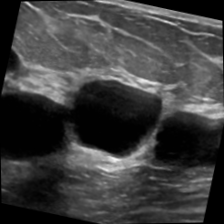

In [8]:
load_img(filepath)

In [49]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
#horizontal_flip=False,shear_range=10,
    #zoom_range=10,
    )

batch_size=32
target_size = (150, 150)
train_ds = train_gen.flow_from_directory('c:/Users/Odiaka/My_shit/flow/breast-cancer/ultrasound breast classification/train', 
                                         target_size=target_size, 
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode='categorical')

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory('c:/Users/Odiaka/My_shit/flow/breast-cancer/ultrasound breast classification/val', 
                                     target_size=(150, 150), 
                                     batch_size=batch_size,
                                     shuffle=False,
                                     class_mode='categorical')

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [50]:
train_ds.class_indices

{'benign': 0, 'malignant': 1}

In [51]:
steps_test = val_ds.n // batch_size
print(steps_test)

epochs = 10
steps_per_epoch = train_ds.n // batch_size
print(steps_per_epoch)

28
253


In [52]:
import keras.backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

img_height, img_width = 150, 150

model = keras.models.Sequential()
# model.add(resize_and_rescale)
# model.add(data_augmentation)
# model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)))
model.add(keras.layers.Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0', input_shape = (150, 150, 3)))


# model.add(keras.layers.Conv2D(32, (3, 3), strides = (1, 1))
model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), name='max_pool'))

# model.add(Conv2D(64, (3, 3), strides = (1,1))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = (1,1), name="conv2"))
model.add(Conv2D(128, (3, 3), strides = (1,1),))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256, (3, 3), strides = (1,1), name="conv3"))
# model.add(Conv2D(256, (3, 3), strides = (1,1),))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
# model.add(AveragePooling2D((3, 3), name='avg_pool'))
model.add(Dropout(0.2))

# model.add(GlobalAveragePooling2D())
model.add(Dense(300, activation="relu", name='rl'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid', name='sm'))

model.summary()

In [54]:
def make_model(learning_rate=learning_rate):
    base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3) # (150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3)) # (150, 150, 3)

    base = base_model(inputs, training=False)

    ap2d = keras.layers.AveragePooling2D()(base)

    vectors = keras.layers.GlobalAveragePooling2D()(ap2d)

    outputs = keras.layers.Dense(2)(vectors)

    model = keras.Model(inputs, outputs)

    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy', 'AUC','Precision','Recall'])
     
    
    return model


In [55]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, steps_per_epoch=30, validation_data=val_ds, validation_steps = 20)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
30/30 [==============================] - 42s 1s/step - loss: 0.9207 - accuracy: 0.5573 - auc: 0.5499 - precision: 0.5363 - recall: 0.6469 - val_loss: 0.6715 - val_accuracy: 0.6672 - val_auc: 0.6146 - val_precision: 0.5769 - val_recall: 0.6625
Epoch 2/10
30/30 [==============================] - 39s 1s/step - loss: 0.6389 - accuracy: 0.6510 - auc: 0.6224 - precision: 0.5762 - recall: 0.7052 - val_loss: 0.4437 - val_accuracy: 0.7844 - val_auc: 0.7520 - val_precision: 0.6957 - val_recall: 0.7609
Epoch 3/10
30/30 [==============================] - 38s 1s/step - loss: 0.5374 - accuracy: 0.7300 - auc: 0.6809 - precision: 0.6150 - recall: 0.7532 - val_loss: 0.4178 - val_accuracy: 0.7875 - val_auc: 0.7633 - val_precision: 0.6996 - val_recall: 0.7641
Epoch 4/10
30/30 [==============================] - 39s 1s/step - loss: 0.5237 - accuracy: 0.7365 - auc: 0.7059 - precision: 0.6395 - recall: 0.7521 - val_loss: 0.3842 - val_accuracy: 0.7937 - val_auc: 0.7984 - val_precision: 0.728

In [56]:
learning_rate = 0.01

In [91]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input,
zoom_range=0.1)

batch_size=32
target_size = (224, 224)
train_ds = train_gen.flow_from_directory('c:/Users/Odiaka/My_shit/flow/breast-cancer/ultrasound breast classification/train', 
                                         target_size=target_size, 
                                         batch_size=batch_size,
                                         shuffle=True,
                                         class_mode='categorical')

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_ds = val_gen.flow_from_directory('c:/Users/Odiaka/My_shit/flow/breast-cancer/ultrasound breast classification/val', 
                                     target_size=target_size, 
                                     batch_size=batch_size,
                                     shuffle=False,
                                     class_mode='categorical')

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [92]:
def make_model(learning_rate=learning_rate):
    base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3) 
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(224, 224, 3)) 

    base = base_model(inputs, training=False)

    ap2d = keras.layers.AveragePooling2D()(base)

    vectors = keras.layers.GlobalAveragePooling2D()(ap2d)

    outputs = keras.layers.Dense(2)(vectors)

    model = keras.Model(inputs, outputs)

    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

 
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy', 'AUC','Precision','Recall'])
     
    
    return model


In [93]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3) 
)

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3)) 

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_23  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_24 (Dense)            (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [94]:
model = make_model(learning_rate=learning_rate)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "ResNet_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, steps_per_epoch=30, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10
30/30 [==============================] - 94s 3s/step - loss: 2.0353 - accuracy: 0.6854 - auc: 0.6969 - precision: 0.7092 - recall: 0.6198 - val_loss: 0.4755 - val_accuracy: 0.8678 - val_auc: 0.8672 - val_precision: 0.9134 - val_recall: 0.7733
Epoch 2/10
30/30 [==============================] - 92s 3s/step - loss: 0.6542 - accuracy: 0.8302 - auc: 0.8433 - precision: 0.8547 - recall: 0.7656 - val_loss: 0.3582 - val_accuracy: 0.8800 - val_auc: 0.8649 - val_precision: 0.9419 - val_recall: 0.7200
Epoch 3/10
30/30 [==============================] - 92s 3s/step - loss: 0.5229 - accuracy: 0.8281 - auc: 0.8482 - precision: 0.8680 - recall: 0.7469 - val_loss: 0.4821 - val_accuracy: 0.8289 - val_auc: 0.8555 - val_precision: 0.9080 - val_recall: 0.7456
Epoch 4/10
30/30 [==============================] - 92s 3s/step - loss: 0.3095 - accuracy: 0.8875 - auc: 0.8983 - precision: 0.9283 - recall: 0.7958 - val_loss: 0.4702 - val_accuracy: 0.8256 - val_auc: 0.8256 - val_precision: 0.8988 - val

## Testing the model

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [37]:
!wget https://img.medscapestatic.com/pi/meds/ckb/39/15939tn.jpg -O img.jpg

--2023-01-17 02:43:00--  https://img.medscapestatic.com/pi/meds/ckb/39/15939tn.jpg
Resolving img.medscapestatic.com (img.medscapestatic.com)... 104.126.244.51
Connecting to img.medscapestatic.com (img.medscapestatic.com)|104.126.244.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12071 (12K) [image/jpeg]
Saving to: 'img.jpg'

     0K .......... .                                          100% 43.5M=0s

2023-01-17 02:43:01 (43.5 MB/s) - 'img.jpg' saved [12071/12071]



In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input

In [39]:
model = keras.models.load_model('ResNet_v1_10_0.916.h5')

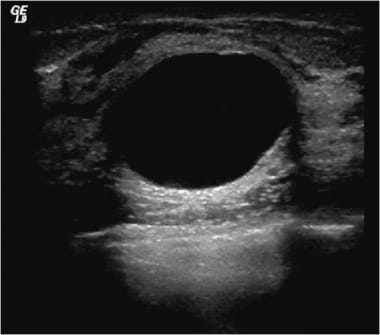

In [40]:
load_img('img.jpg')

In [41]:
img = load_img('img.jpg', target_size=(224, 224))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [54]:
preds = model.predict(X)
preds

1/1 [==============================] - 0s 91ms/step


array([[ 11.824574, -16.339632]], dtype=float32)

In [55]:
classes = [
    'Benign',
    'Malignant'
]

In [65]:
score = dict(zip(classes, preds[0]))

print(
    "Prediction: {}."
    .format(classes[np.argmax(score)])      #, 100 * np.max(preds[0][0])
)

Prediction: Benign.


In [66]:
result = tf.nn.softmax(preds[0])

print(
    "Prediction: {}.   Confidence: {:.2f}%"
    .format(classes[np.argmax(result)], round(100 * np.max(result),1))
)

Prediction: Benign.   Confidence: 100.00%


## TensorFlow Lite

In [67]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('cancer_model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Odiaka\AppData\Local\Temp\tmpskbjgc1a\assets


INFO:tensorflow:Assets written to: C:\Users\Odiaka\AppData\Local\Temp\tmpskbjgc1a\assets


In [68]:
!ls -lh

total 181M
-rw-r--r-- 1 Odiaka 197121  91M Jan 15 05:54 ResNet_v1_10_0.916.h5
-rw-r--r-- 1 Odiaka 197121  13K Dec  5  2021 cancer_model.h5
-rw-r--r-- 1 Odiaka 197121  90M Jan 17 03:05 cancer_model.tflite
-rw-r--r-- 1 Odiaka 197121  12K Apr 20  2022 img.jpg
-rw-r--r-- 1 Odiaka 197121 676K Mar  9  2021 img.png
-rw-r--r-- 1 Odiaka 197121 170K Jan 17 03:05 notebook.ipynb
drwxr-xr-x 1 Odiaka 197121    0 Jan 17 01:44 train
drwxr-xr-x 1 Odiaka 197121    0 Jan 17 01:44 val


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e90ca178-3496-4ed5-9955-ff8c89a5599d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [69]:
from PIL import Image

In [70]:
with Image.open('img.jpg') as img:
    img = img.resize((224, 224), Image.NEAREST)

C:\Users\Odiaka\AppData\Local\Temp\ipykernel_25904\1690208398.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.resize((224, 224), Image.NEAREST)


In [71]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [72]:
x = np.array(img, dtype='float32')
X = np.array([x])

X = preprocess_input(X)

In [74]:
import tensorflow.lite as tflite

In [75]:
interpreter = tflite.Interpreter(model_path='cancer_model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [76]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [77]:
classes = [
    'Benign',
    'Malignant'
]

In [78]:
score = dict(zip(classes, preds[0]))

print(
    "Prediction: {}."
    .format(classes[np.argmax(score)])      
)

Prediction: Benign.
